In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to read a *.csv* file containing data collected from a stationary probe.

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file.*</small>

## Setup

Make sure you have PODPAC installed with the **datatype** optional dependencies:

```
$ pip install podpac[datatype]
```


# How to open a .csv file with PODPAC

The `podpac.data.CSV` node reads point data files stored as *.csv*

PODPAC uses the [pandas](https://pandas.pydata.org/) Python package internally to parse *.csv* files.



## Reading COSMOS .csv file

* Specify the column used for the data (`data_col`)
* Specify the column(s) used for the coordinates:
    * `lat_col`
    * `lon_col`
    * `time_col`
    * `alt_col`

In [2]:
import podpac

# Get the file path from the podpac_examples repository
filename = '../../data/point/cosmos_station054.csv'

# Let's preview the first few lines of the csv file
with open(filename, 'r') as f:
    preview = f.readlines()[:5]
    
preview

['YYYY-MM-DD HH:MM(UTC),MOD(/hr),UNMO(/hr),PRESS(mb),TEM(C),RH(%),BATT(V)\n',
 '2011-09-23 15:28,497,474,998.7,22,61,15.0\n',
 '2011-09-23 16:28,525,500,997.8,23,40,15.0\n',
 '2011-09-23 17:28,503,497,997.0,23,34,15.0\n',
 '2011-09-23 18:31,542,517,996.2,23,31,15.0\n']

In [3]:
# Set up the PODPAC node to read this file
# and indicate the columns for data and coordinates (only time here)
cosmos = podpac.data.CSV(source=filename, time_col=0, data_col='RH(%)')
cosmos

CSV DataSource
	source: ../../data/point/cosmos_station054.csv
	interpolation: nearest

In [4]:
# The native coordinates of the dataset contain the resolution and bounds
cosmos.native_coordinates

Coordinates
	time: ArrayCoordinates1d(time): Bounds[2011-09-23T15:28, 2013-09-13T12:47], N[15293], ctype['point']

## Read and display all data in the file

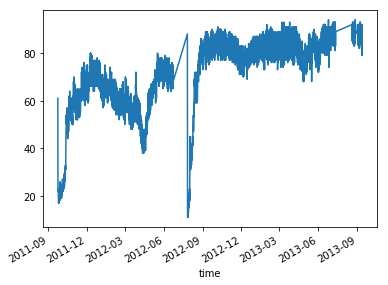

In [5]:
# Evaluate at the native_coordinates and plot
o = cosmos.eval(cosmos.native_coordinates)
o.plot()
pass

## Reading a subset of file

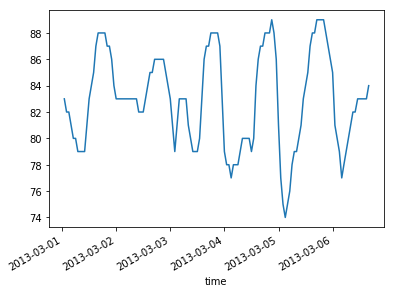

In [6]:
# Find the native coordinates within certain time bounds
bounds = podpac.Coordinates([['2013-03-01', '2013-03-07']], ['time'])
coords = cosmos.native_coordinates.intersect(bounds)

# Evaluate at subset of coordinates and plot the data
o = cosmos.eval(coords)
o.plot()
pass

## Reading data at offset coordinates

> This example uses the Coordines helper function `clinspace` to create a set of linearly spaced time coordinates.
>
> See [020-using-coordinates.ipynb](020-using-coordinates.ipynb) for more information on PODPAC Coordinates.

In [7]:
# Define coordinates that are different from native_coordinates
time_coordinates = podpac.clinspace('2013-01-01', '2013-03-01', 60)
coords = podpac.Coordinates([time_coordinates], dims=['time'])
coords

Coordinates
	time: UniformCoordinates1d(time): Bounds[2013-01-01, 2013-03-01], N[60], ctype['midpoint']

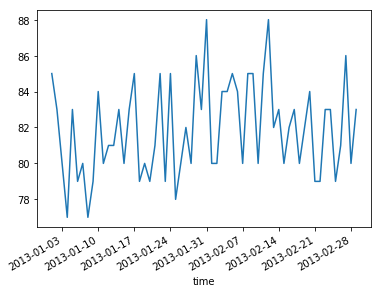

In [8]:
# Evaluate at subset of coordinates and plot the data
o = cosmos.eval(coords)
o.plot()
pass